In [1]:
import os

# from nltk.tree import ParentedTree
from discoursegraphs.readwrite.tree import DGParentedTree
# from nltk.draw.tree import TreeView
# from discoursegraphs.readwrite.rst.dis.distree import DisRSTTree

import discoursegraphs as dg

In [2]:
from discoursegraphs.readwrite.tree import t
from discoursegraphs.readwrite.rst.dis.distree import n_wrap, s_wrap

In [3]:
HILDA_SHORT = """ParseTree('Contrast[S][N]', ["Although they did n't like it ,", 'they accepted the offer .'])"""
HILDA_LONG = """ParseTree('Elaboration[N][S]', [ParseTree('Joint[N][N]', [ParseTree('Elaboration[N][S]', ['Henryk Szeryng ( 22 September 1918 - 8 March 1988 )', 'was a violin virtuoso of Polish and Jewish heritage .']), ParseTree('Joint[N][N]', [ParseTree('Joint[N][N]', ['He was born in Zelazowa Wola , Poland .', ParseTree('Joint[N][N]', [ParseTree('Background[N][S]', ['Henryk started piano and harmony training with his mother', 'when he was 5 ,']), 'and at age 7 turned to the violin ,'])]), ParseTree('Joint[N][N]', [ParseTree('Elaboration[N][S]', ['receiving instruction from Maurice Frenkel .', ParseTree('Temporal[S][N]', [ParseTree('Elaboration[N][S]', ['After studies with Carl Flesch in Berlin', '( 1929-32 ) ,']), ParseTree('Elaboration[N][S]', ['he went to Paris to continue his training with Jacques Thibaud at the Conservatory ,', 'graduating with a premier prix in 1937 .'])])]), ParseTree('Joint[N][N]', [ParseTree('Elaboration[N][S]', ['He made his solo debut in 1933', 'playing the Brahms Violin Concerto .']), ParseTree('Joint[N][N]', ['From 1933 to 1939 he studied composition in Paris with Nadia Boulanger ,', ParseTree('Joint[N][N]', [ParseTree('Elaboration[N][S]', ['and during World War II he worked as an interpreter for the Polish government in exile', '( Szeryng was fluent in seven languages )']), ParseTree('Elaboration[N][S]', ['and gave concerts for Allied troops all over the world .', 'During one of these concerts in Mexico City he received an offer to take over the string department of the university there .'])])])])])])]), ParseTree('Elaboration[N][S]', [ParseTree('Elaboration[N][S]', [ParseTree('Joint[N][N]', [ParseTree('Attribution[N][S]', ['In 1946 ,', 'he became a naturalized citizen of Mexico .']), ParseTree('Elaboration[N][S]', ['Szeryng subsequently focused on teaching before resuming his concert career in 1954 .', ParseTree('Joint[N][N]', ['His debut in New York City brought him great acclaim ,', ParseTree('Elaboration[N][S]', ['and he toured widely for the rest of his life .', ParseTree('Attribution[S][N]', ['He died', 'in Kassel .'])])])])]), ParseTree('Elaboration[N][S]', [ParseTree('Elaboration[N][S]', [ParseTree('Elaboration[N][S]', ['Szeryng made a number of recordings ,', 'including two of the complete sonatas and partitas for violin by Johann Sebastian Bach , and several of sonatas of Beethoven and Brahms with the pianist Arthur Rubinstein .']), 'He also composed ;']), 'his works include a number of violin concertos and pieces of chamber music .'])]), ParseTree('Elaboration[N][S]', ["He owned the Del Gesu `` Le Duc '' , the Stradivarius `` King David '' as well as the Messiah Strad copy by Jean-Baptiste Vuillaume", ParseTree('Attribution[S][N]', ['which he gave to Prince Rainier III of Monaco .', ParseTree('Elaboration[N][S]', ["The `` Le Duc '' was the instrument", ParseTree('Contrast[N][N]', ['on which he performed and recorded mostly ,', ParseTree('Elaboration[N][S]', [ParseTree('same-unit[N][N]', [ParseTree('Elaboration[N][S]', ['while the latter', "( `` King David ''"]), 'Strad )']), 'was donated to the State of Israel .'])])])])])])])"""

In [4]:
import re
from nltk.tree import Tree

# FIXME: description
def hildastr2hildatree(parse_tree_str):
    """convert a parse tree string produced by the HILDA RST parser into
    an DGParentedTree representation of that parse tree.
    """
    # This is basically a poor man's typecast.
    # (ParseTree is a subclass of nltk.tree.ParentedTree that is only used by HILDA.
    # DGParentedTree is a subclass of nltk.tree.ParentedTree that is only used by discoursegraphs.)
    parented_tree_str = re.sub('ParseTree', 'Tree', parse_tree_str)
    # Try this in golang, suckers!
    return eval(parented_tree_str)

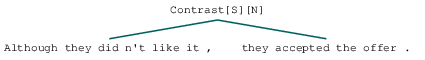

In [5]:
htshort = hildastr2hildatree(HILDA_SHORT)
htshort

In [6]:
import re

In [7]:
HILDA_REL_RE = re.compile("^(.*)\[(N|S)\]\[(N|S)\]$")
# HILDA_REL_RE = re.compile("^(?P<relation>.*)\[(?P<left_child_nuclearity>N|S)\]\[(?P<right_child_nuclearity>N|S)\]$")


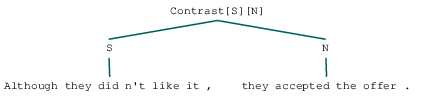

In [8]:
t(htshort.label(), [
    s_wrap(htshort[0]),
    n_wrap(htshort[1])
])

In [9]:
def convert(ht):
    if isinstance(ht, basestring) or not hasattr(ht, 'label'):
        return ht
    assert len(ht) == 2, "We can only handle binary trees."
    
    match = HILDA_REL_RE.match(ht.label())
    assert match, "Relation '{}' does not match regex '{}'".format(ht.label(), HILDA_REL_RE)
    relname, left_child_nuc, right_child_nuc = match.groups()
    ht._label = relname        

    for i, child_nuclearity in enumerate([left_child_nuc, right_child_nuc]):
        child = ht[i]
        ht[i] = Tree(child_nuclearity, [convert(child)])
    return ht
        

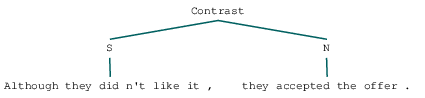

In [10]:
htshort = hildastr2hildatree(HILDA_SHORT)
convert(htshort)

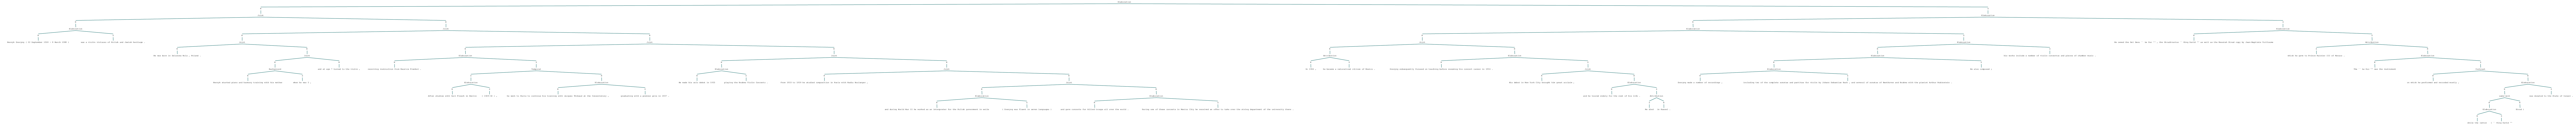

In [11]:
htlong = hildastr2hildatree(HILDA_LONG)
convert(htlong)

In [23]:
# dg.readwrite.rst.rs3.RS3FileWriter(htlong)
dgphtlong = DGParentedTree.convert(htlong)

In [28]:
from rstviewer import embed_rs3str_image
embed_rs3str_image(dg.readwrite.rst.rs3.RS3FileWriter(dgphtlong))

<rst>
  <header>
    <relations>
      <rel name="Attribution" type="rst"/>
      <rel name="Background" type="rst"/>
      <rel name="Contrast" type="multinuc"/>
      <rel name="Elaboration" type="rst"/>
      <rel name="Joint" type="multinuc"/>
      <rel name="Temporal" type="rst"/>
      <rel name="same-unit" type="multinuc"/>
    </relations>
  </header>
  <body>
    <segment id="7" parent="5" relname="span">Henryk Szeryng ( 22 September 1918 - 8 March 1988 )</segment>
    <segment id="9" parent="7" relname="Elaboration">was a violin virtuoso of Polish and Jewish heritage .</segment>
    <segment id="15" parent="13" relname="Joint">He was born in Zelazowa Wola , Poland .</segment>
    <segment id="21" parent="19" relname="span">Henryk started piano and harmony training with his mother</segment>
    <segment id="23" parent="21" relname="Background">when he was 5 ,</segment>
    <segment id="25" parent="17" relname="Joint">and at age 7 turned to the violin ,</segment>
    <segment 

AttributeError: 'RS3FileWriter' object has no attribute 'encode'

In [ ]:
from rstviewer import embed_rs3str_image

In [ ]:
from rstviewer import embed_rs3str_image

In [20]:
from rstviewer import embed_rs3_image
embed_rs3_image?

# TODO: compare with CODRA

## reading .dis into a document graph

In [12]:
disdg1 = dg.read_dis(os.path.join(dg.DATA_ROOT_DIR, 'rst-example1.dis'))
type(disdg1)

discoursegraphs.readwrite.rst.dis.disgraph.RSTLispDocumentGraph

In [13]:
# %load_ext gvmagic # load this once

In [14]:
# %dotstr dg.print_dot(disdg1)

In [15]:
codra_disfile = 'codra-output-test.txt'
# disdg_codra = dg.read_dis(codra_disfile)

In [16]:
#children[0]
ParentedTree('Satellite', [ParentedTree('span', ['36', '37']), ParentedTree('rel2par', ['Manner-Means']), ParentedTree('Nucleus', [ParentedTree('leaf', ['36']), ParentedTree('rel2par', ['span']), ParentedTree('text', ['_!by', 'Jean-Baptiste', 'Vuillaume_!'])]), ParentedTree('Satellite', [ParentedTree('leaf', ['37']), ParentedTree('rel2par', ['Elaboration']), ParentedTree('text', ['_!which', 'he', 'gave', 'to', 'Prince', 'Rainier', 'III', 'of', 'Monaco', '._!'])])])


NameError: name 'ParentedTree' is not defined

In [ ]:
from discoursegraphs.readwrite.rst.dis.common import DisFile
codra_disfiletree = DisFile(codra_disfile)

In [ ]:
codra_disfiletree.tree

In [ ]:
ct = codra_disfiletree.tree

In [ ]:
EXAMPLE2_FILE = os.path.join(dg.DATA_ROOT_DIR, 'rst-example2.dis')
test_disfiletree = DisFile(EXAMPLE2_FILE)

In [ ]:
test_disfiletree.tree

In [ ]:
from discoursegraphs.readwrite.rst.dis.distree import DisRSTTree

DisRSTTree(EXAMPLE2_FILE)

In [ ]:

# DisFile(codra_disfile, filter_strings=False).tree

In [ ]:
codra_disrsttree = DisRSTTree(codra_disfile)

In [ ]:
codra_disrsttree.tree.leaves()[0] = u'Henryk Szeryng'

In [ ]:
codra_disrsttree.tree.leaves()

In [ ]:
crt = codra_disrsttree.tree



In [ ]:
import re

In [ ]:
EDU_START_RE = re.compile("^_!")
EDU_END_RE = re.compile("_!$")
TRIPLE_ESCAPE_RE = re.compile(r'\\\\\\"') # string contains a " char

In [ ]:

ct

In [ ]:
cleanup_codra_edus(crt)

In [ ]:
class CodraRSTTree(DisRSTTree):
    def __init__(self, dis_filepath, word_wrap=0, debug=False):
        super(CodraRSTTree, self).__init__(dis_filepath, word_wrap=word_wrap, debug=debug)
        self.cleanup_codra_edus()
    
    def cleanup_codra_edus(self):
        """Remove leading/trailing '_!' from CODRA EDUs and unescape its double quotes."""
        for leafpos in self.tree.treepositions('leaves'):
            edu_str = self.tree[leafpos]

            edu_str = EDU_START_RE.sub("", edu_str)    
            edu_str = TRIPLE_ESCAPE_RE.sub('"', edu_str)
            edu_str = EDU_END_RE.sub("", edu_str)

            self.tree[leafpos] = edu_str

In [ ]:
CodraRSTTree(codra_disfile)

In [ ]:
dg.readwrite.rst.rs3.RS3FileWriter(CodraRSTTree(codra_disfile))